# Submission 2 - Intermediate

**Instructions**
- Fill out the 'Basic Information' and 'Simple Hypotheses - Findings / Insights' sections (replace the TODOs with your information)
  - If your visualization is interactive, create a short video that shows the interactivity (max. 3 min).
- Export the Jupyter notebook as a HTML file and save it in this repository.
  - Go to 'File' -> 'Save and Export Notebook As..' -> 'HTML'.
  - Save it locally in your project folder. You can leave the name as it is.
  - If you have a video, then add it to the project folder.
  - Push your local changes to the GitHub repository.
- Upload the generated HTML for the Moodle submission.
  - If you have a video, then upload that for the Moodle submission, too.

---
## Basic Information

**Team Name:** TODO

**Team Members:**
- TODO
- TODO
- TODO
- TODO

**Dataset Description:**  
(max. 75 words)

TODO

---
## Simple Hypotheses - Findings / Insights

**Instructions:**
- Add your visualizations (**max. 4**) here
  - The visualizations should show the findings / insights
- Add the descriptions for all your findings / insights (**max. 150 words**)
  - The description should also relate to the visualizations above.

### Visualizations

TODO

### Description

TODO

## Load Data

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [30]:
covid_cases_age_group = pd.read_csv("../data/covid_data/CovidFaelle_Altersgruppe.csv", names=["time","agegroupID","agegroup","state","stateID","num_residents","sex","infected","cured","dead"], delimiter =";",skiprows= 1)
covid_cases_timeline = pd.read_csv("../data/covid_data/CovidFaelle_Timeline.csv", names=["Time","state","stateID","num_residents","infected","infected_sum","num_infected_last_7_days","incident_last_7_days","daily_death_count","dead_sum","daily_healed","healed_sum"], delimiter =";",skiprows= 1)
covid_cases_timeline_groupby_disctrict = pd.read_csv("../data/covid_data/CovidFaelle_Timeline_GKZ.csv", names=["time","county","district_id","num_residents","infected","infected_sum","num_infected_last_7_days","incident_last_7_daysle","dead"], delimiter =";",skiprows= 1)
covid_test_data = pd.read_csv("../data/covid_data/CovidFallzahlen.csv", names=["date","num_tests","date_2","FZHosp","FZICU","FZHospFree","FZICUFree","stateID","state"], delimiter =";",skiprows= 1)
hospitalization_data = pd.read_csv("../data/covid_data/Hospitalisierung.csv", names=["date","stateID","state","occupied_normal_care_hospital_beds","available_intensiv_care_hospital_beds","occupied_intensiv_care_hospital_beds","intensive"], delimiter =";",skiprows= 1)
vaccine_data = pd.read_csv("../data/covid_data/COVID19_vaccination_doses_timeline.csv", names=["date","state_id","state_name","vaccine","dose_number","doses_administered_cumulative"], delimiter =";",skiprows= 1)
demographics_data =  pd.read_csv("../data/covid_data/demographic_austria.csv", names=["state","2019","2020","2021","2022"], delimiter =";",skiprows= 1)                                                                                                          
                                                                                                            

### First analysis and clean-up

Hypothesis to investigate "The number of new daily Covid-19 infections in Austria does vary between seasons"

In [31]:
covid_cases_timeline.head(10)

,Time,state,stateID,num_residents,infected,infected_sum,num_infected_last_7_days,incident_last_7_days,daily_death_count,dead_sum,daily_healed,healed_sum
0,26.02.2020 00:00:00,Burgenland,1,299235,0,0,0,0,0,0,0,0
1,26.02.2020 00:00:00,Kärnten,2,566166,0,0,0,0,0,0,0,0
2,26.02.2020 00:00:00,Niederösterreich,3,1708140,0,0,0,0,0,0,0,0
3,26.02.2020 00:00:00,Oberösterreich,4,1512226,0,0,0,0,0,0,0,0
4,26.02.2020 00:00:00,Salzburg,5,564293,0,0,0,0,0,0,0,0
5,26.02.2020 00:00:00,Steiermark,6,1256890,0,0,0,0,0,0,0,0
6,26.02.2020 00:00:00,Tirol,7,766492,0,0,0,0,0,0,0,0
7,26.02.2020 00:00:00,Vorarlberg,8,403203,0,0,0,0,0,0,0,0
8,26.02.2020 00:00:00,Wien,9,1951354,1,1,1,"0,05124647",0,0,0,0
9,26.02.2020 00:00:00,Österreich,10,9027999,1,1,1,"0,01107665",0,0,0,0


In [32]:
df = covid_cases_timeline.copy()

len(df.columns)

#df.index

12

In [81]:
df_clean = df.drop(columns = ['state', 'stateID', 'num_residents', 'infected_sum' , 'num_infected_last_7_days', 'incident_last_7_days', 'daily_death_count', 'dead_sum', 'daily_healed', 'healed_sum'])
df_clean['Time'] = pd.to_datetime(df_clean['Time'])
df_clean = df_clean.set_index('Time')

In [101]:
df_aggregated = df_clean.groupby(pd.Grouper(freq='M')).sum().reset_index()

df_aggregated['Time'] = pd.to_datetime(df_aggregated['Time'])

In [109]:
df_aggregated

,Time,infected
0,2020-01-31,20504
1,2020-02-29,21678
2,2020-03-31,37430
3,2020-04-30,27344
4,2020-05-31,24376
5,2020-06-30,25936
6,2020-07-31,24760
7,2020-08-31,31298
8,2020-09-30,47616
9,2020-10-31,134170


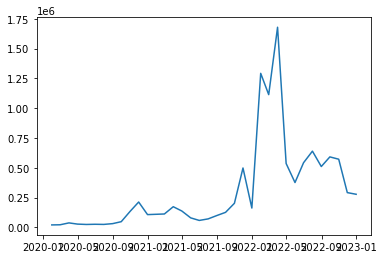

In [102]:
plt.plot('Time','infected', data = df_aggregated )

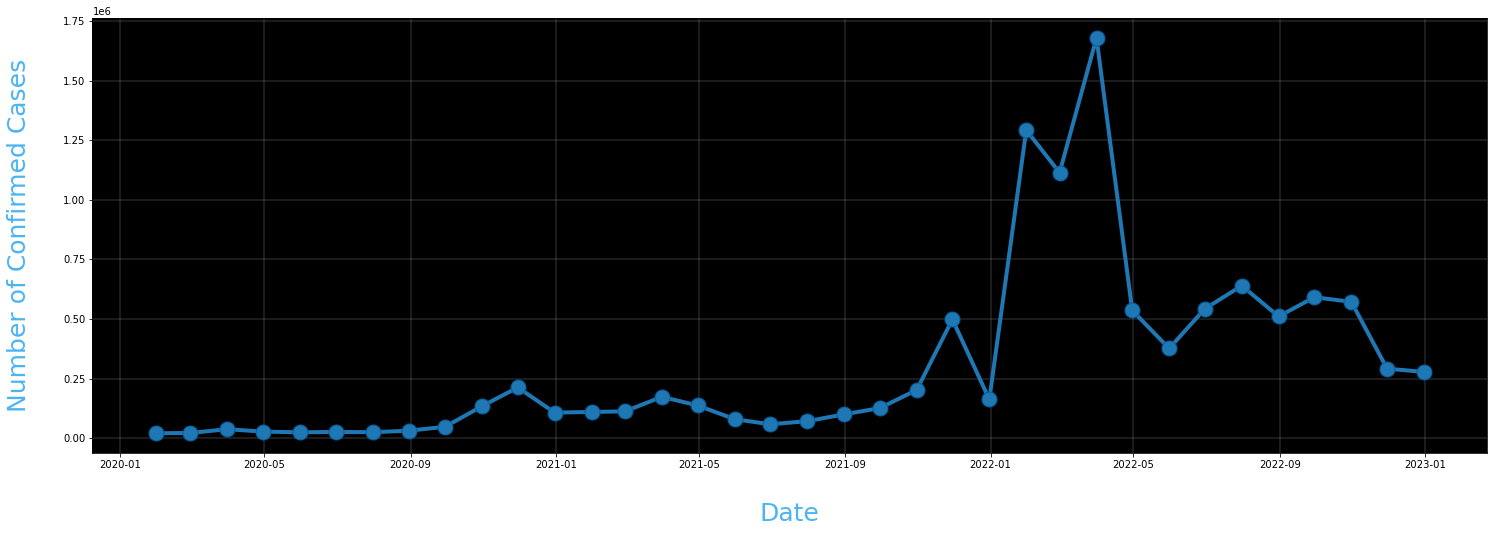

In [107]:
Y = df_aggregated['infected']
X = df_aggregated['Time']
 
plt.figure(figsize=(25,8))
 
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')
 
ax.set_facecolor("black")
ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=25,color='#4bb4f2')
 
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')

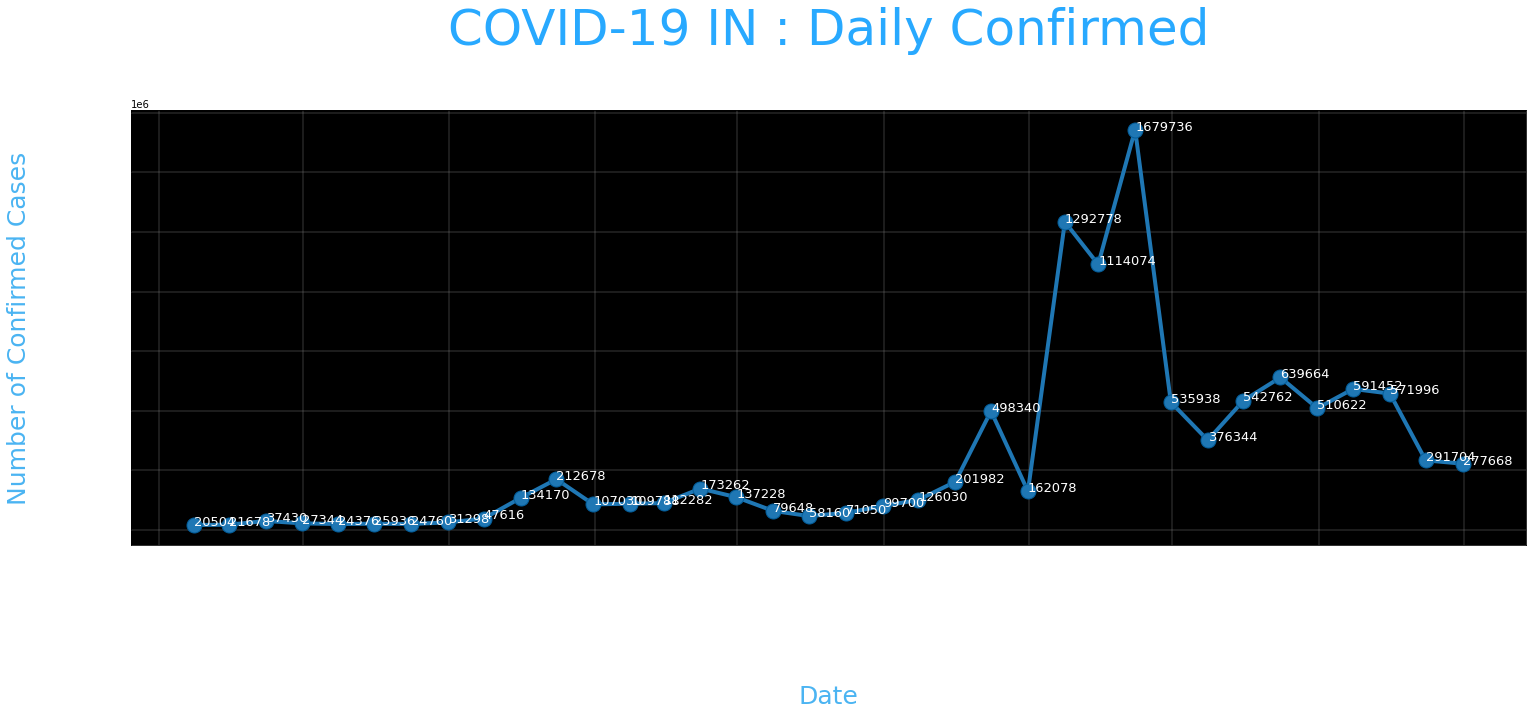

In [108]:
plt.figure(figsize=(25,8))
 
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')
 
ax.set_facecolor("black")
ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=25,color='#4bb4f2')
 
plt.xticks(rotation='vertical',size='20',color='white')
plt.yticks(size=20,color='white')
plt.tick_params(size=20,color='white')
 
for i,j in zip(X,Y):
    ax.annotate(str(j),xy=(i,j+100),color='white',size='13')
     
ax.annotate('Second Lockdown 15th April',
            xy=(15.2, 860),
            xytext=(19.9,500),
            color='white',
            size='25',
            arrowprops=dict(color='white',
                            linewidth=0.025))
 
plt.title("COVID-19 IN : Daily Confirmed\n",
          size=50,color='#28a9ff')
 
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')

<AxesSubplot:title={'center':'infected'}, xlabel='Time'>

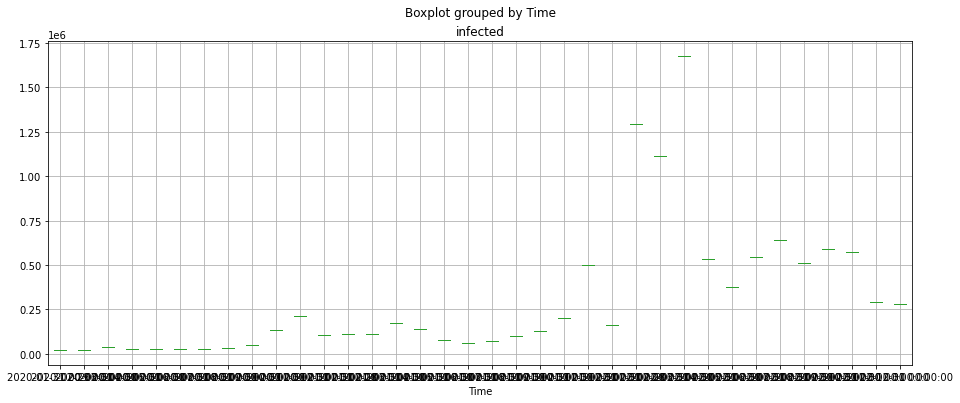

In [105]:
df_aggregated.boxplot(figsize=(15,6),by='Time',column='infected')
